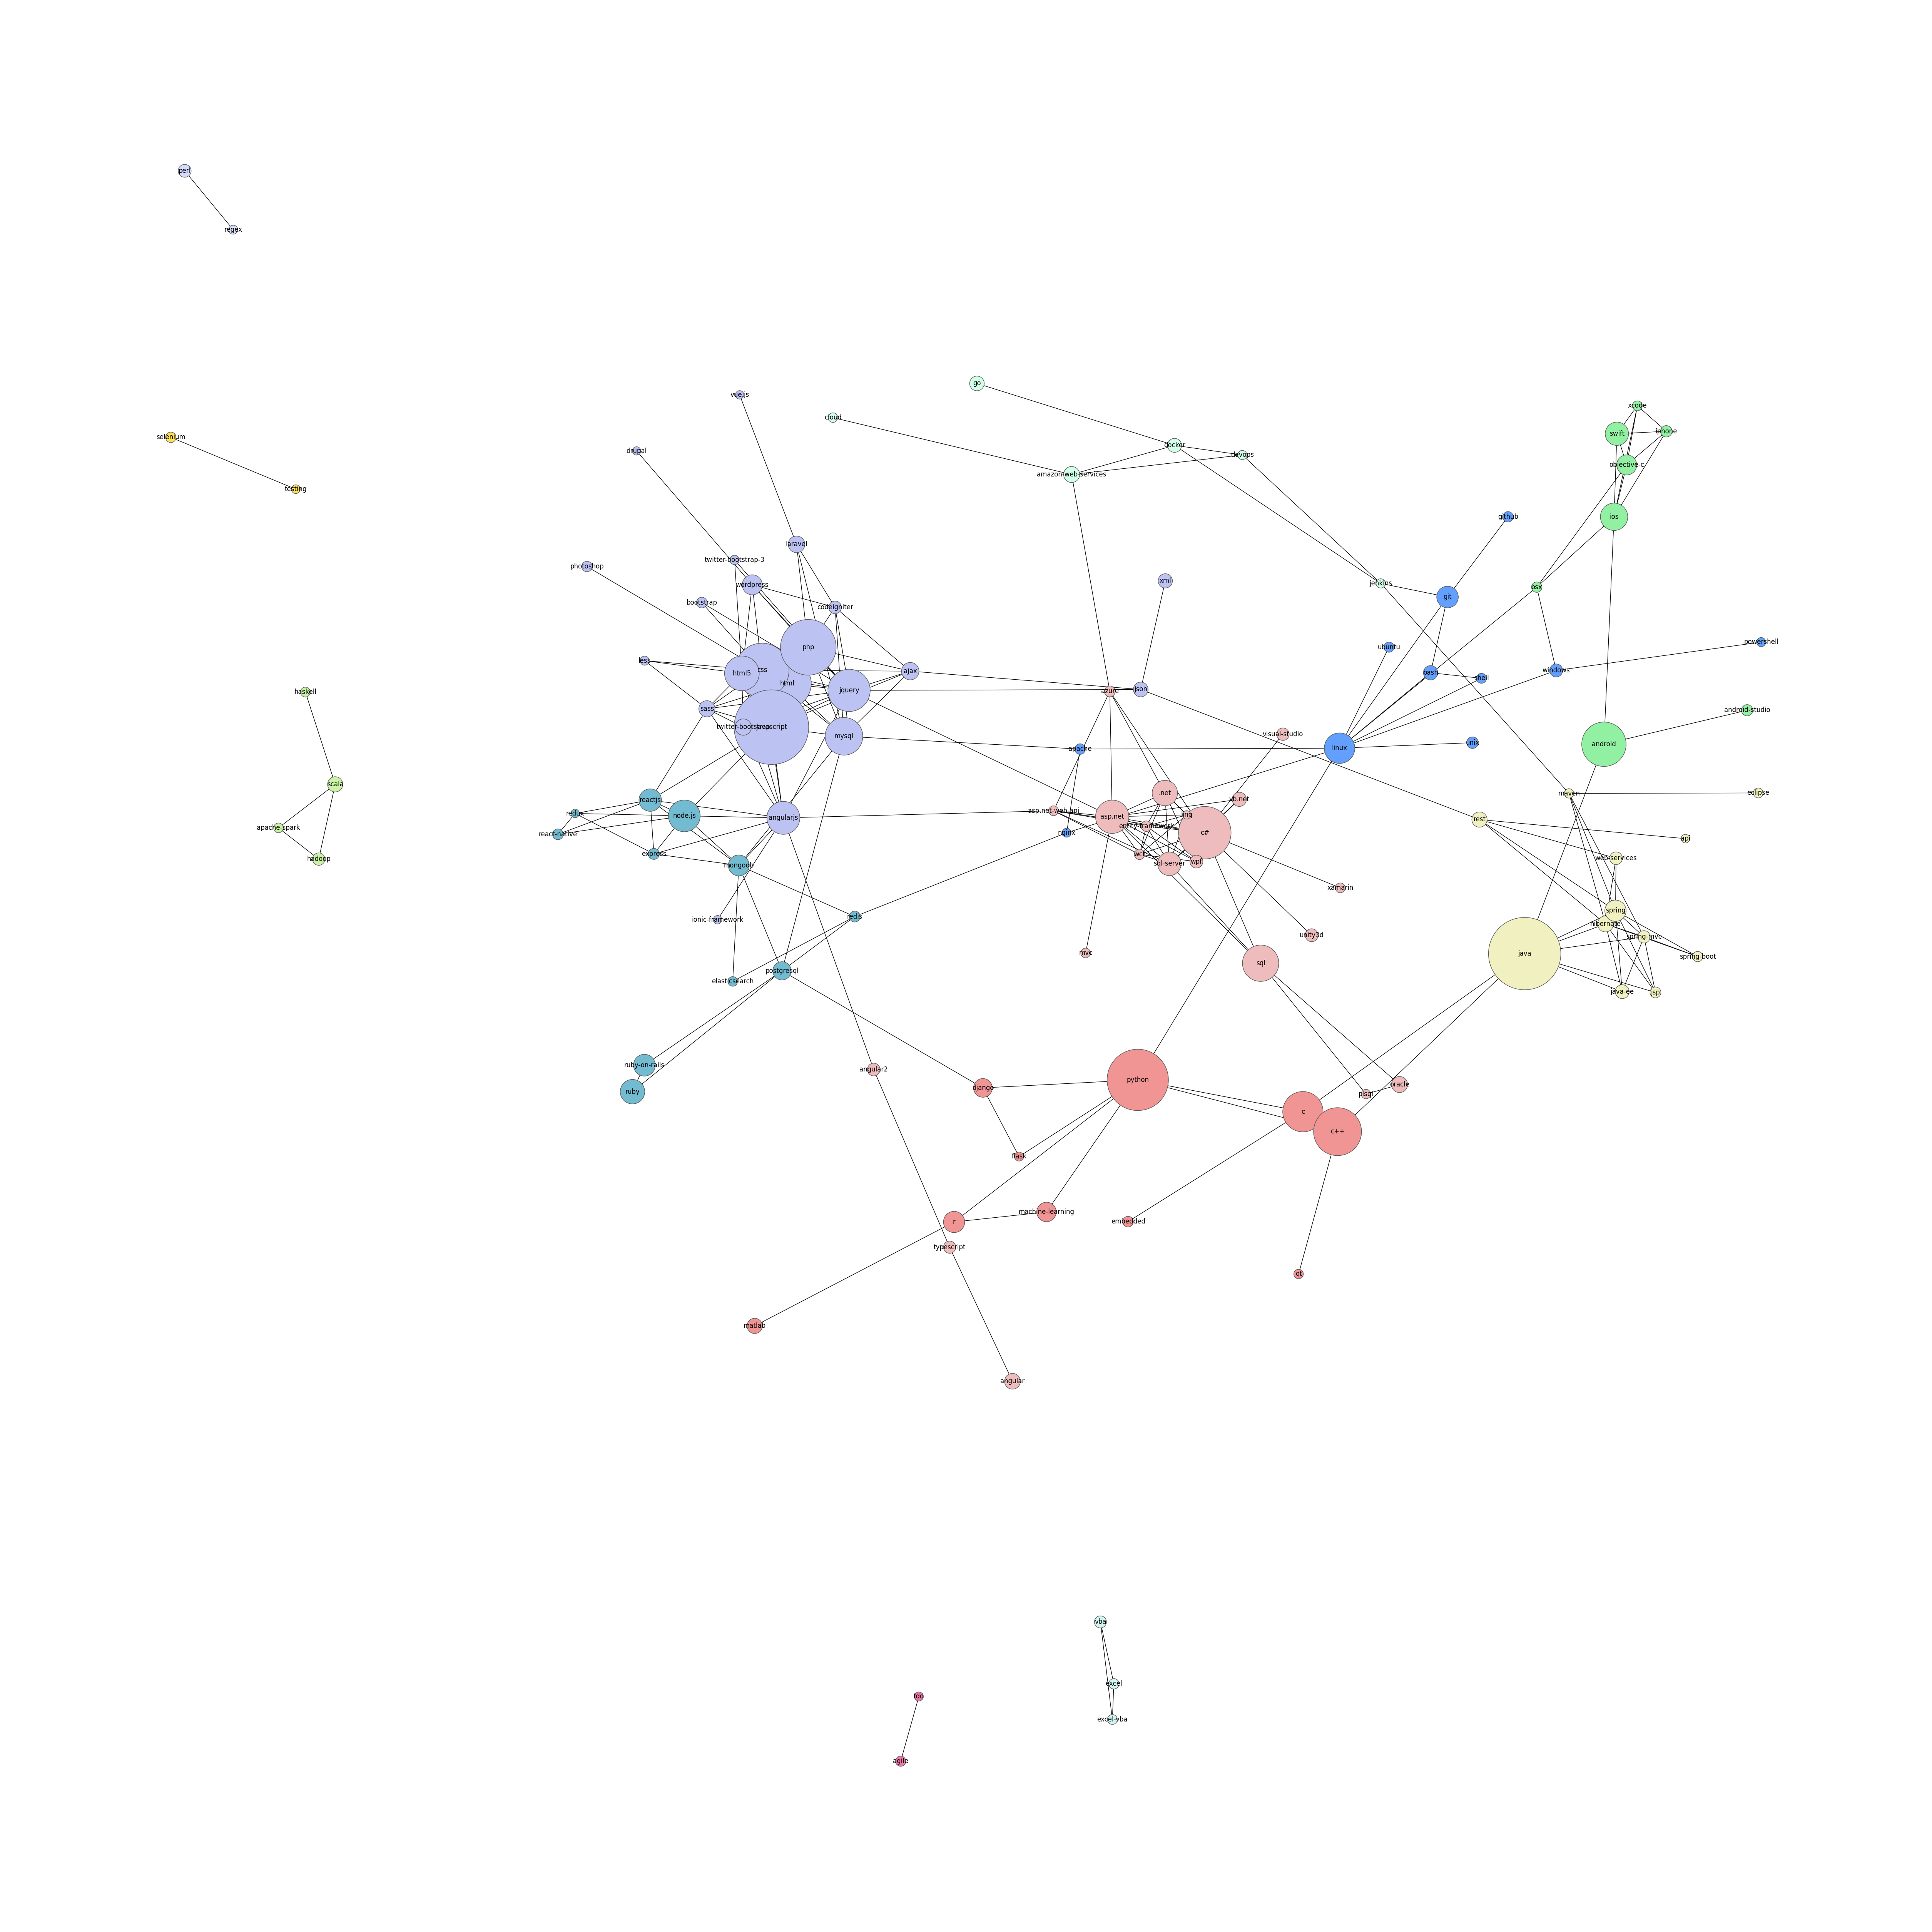

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

G_stack = nx.Graph(day="Stackoverflow")
nodes_dset = pd.read_csv('stack_network_nodes.csv')
edges_dset = pd.read_csv('stack_network_links.csv')

for i, r in nodes_dset.iterrows():
    G_stack.add_node(r['name'], group=r['group'], nodesize=r['nodesize'])

for i, r in edges_dset.iterrows():
    G_stack.add_weighted_edges_from([(r['source'], r['target'], r['value'])])
# print(len(G))
# list(G.nodes)
nodes_dset.head()

edges_dset.head()

c_map = {1: '#f09494', 2: '#eebcbc', 3: '#72bbd0', 4: '#91f0a1', 5: '#629fff', 6: '#bcc2f2',
         7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa',
         13:'#d6dcff', 14:'#d2f5f0'}

plt.figure(figsize=(50,50))
options = {
    #'edge_color': '#FFDEA2',
    'edge_color': '#000000',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}
colors = [c_map[G_stack.nodes[node]['group']] for node in G_stack]
sizes = [G_stack.nodes[node]['nodesize'] * 30 for node in G_stack]

"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""
nx.draw(G_stack, node_color=colors, node_size=sizes, pos=nx.spring_layout(G_stack, k=0.5, iterations=50), **options)
axis = plt.gca()
axis.collections[0].set_edgecolor("#555555")
plt.show()